In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Filtering the Warnings
warnings.filterwarnings("ignore")
print('Libraries Loaded Sucessfully...!')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Libraries Loaded Sucessfully...!
['deliveries.csv', 'matches.csv']


In [2]:
# Loading the Dataset into the Memory
match_dataset = pd.read_csv('../input/matches.csv')
print('DataSet Loaded Sucessfully...!')

DataSet Loaded Sucessfully...!


In [3]:
# Printing the Details of the Dataset
match_dataset.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# Getting the Information Of the Dataset
match_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [5]:
# Describing the Dataset

match_dataset.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [6]:
# Counting the Null Values in the Dataset

match_dataset.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [7]:
# Since umpire3 columns has more number of null values we don't need that column

In [8]:
# Few Changes need to add for the Team Names
match_dataset.replace( 'Rising Pune Supergiant', 'Rising Pune Supergiants',inplace = True)

In [9]:
# Getting the Details of Number Of Player who got Man Of The Match Award

player_of_match = dict()

for player in match_dataset['player_of_match']:
    player_of_match[player] = player_of_match.get(player, 0) + 1
    
for player, name in player_of_match.items():
    print('{} : {}'.format(player, name))

Yuvraj Singh : 5
SPD Smith : 4
CA Lynn : 4
GJ Maxwell : 5
KM Jadhav : 2
Rashid Khan : 6
N Rana : 4
AR Patel : 4
SV Samson : 5
JJ Bumrah : 2
SP Narine : 9
KA Pollard : 9
AJ Tye : 2
RV Uthappa : 7
CJ Anderson : 3
BA Stokes : 3
NM Coulter-Nile : 4
B Kumar : 5
CH Gayle : 20
KS Williamson : 3
JC Buttler : 4
SK Raina : 14
MJ McClenaghan : 2
MS Dhoni : 14
HM Amla : 2
G Gambhir : 13
LH Ferguson : 1
KH Pandya : 4
Sandeep Sharma : 5
DA Warner : 15
RG Sharma : 16
Mohammed Shami : 1
RA Tripathi : 1
RR Pant : 3
JD Unadkat : 4
LMP Simmons : 3
DR Smith : 11
S Dhawan : 4
MM Sharma : 2
SS Iyer : 3
WP Saha : 3
KK Nair : 3
Mohammed Siraj : 1
AT Rayudu : 9
HV Patel : 2
Washington Sundar : 1
KV Sharma : 1
BB McCullum : 5
MEK Hussey : 12
MF Maharoof : 1
MV Boucher : 2
DJ Hussey : 2
SR Watson : 13
V Sehwag : 11
ML Hayden : 4
YK Pathan : 16
KC Sangakkara : 5
JDP Oram : 1
AC Gilchrist : 7
SM Katich : 1
ST Jayasuriya : 2
GD McGrath : 1
SE Marsh : 9
SA Asnodkar : 1
R Vinay Kumar : 3
IK Pathan : 2
SM Pollock : 2


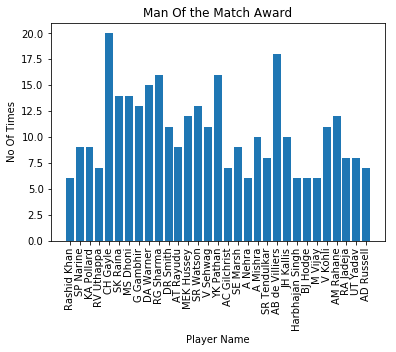

In [10]:
# Plotting the results of Man Of the Match Award in IPL 2008 - 2018
player_names = list(player_of_match.keys())
number_of_times = list(player_of_match.values())
manOfTheMatch = dict()

for Name,value in player_of_match.items():
    if value >= 6:
        manOfTheMatch[Name] = value
# Plotting the Graph

plt.bar(range(len(manOfTheMatch)), manOfTheMatch.values())
plt.xticks(range(len(manOfTheMatch)), list(manOfTheMatch.keys()), rotation='vertical')
plt.xlabel('Player Name')
plt.ylabel('No Of Times')
plt.title('Man Of the Match Award')
plt.show()

In [11]:
# Number Of Matches wins by Each Team
matches_win = match_dataset['winner'].sort_values().value_counts()
matches_win

Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Kings XI Punjab                76
Rajasthan Royals               70
Delhi Daredevils               67
Sunrisers Hyderabad            52
Deccan Chargers                29
Rising Pune Supergiants        15
Gujarat Lions                  13
Pune Warriors                  12
Kochi Tuskers Kerala            6
Name: winner, dtype: int64

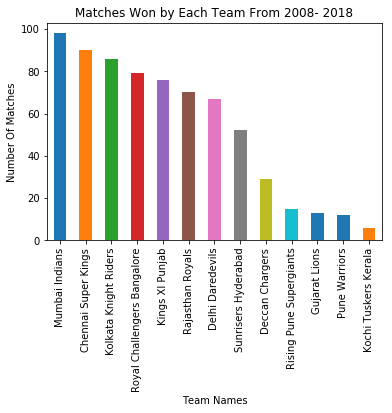

In [12]:
matches_win.plot(kind='bar', title='Matches Won by Each Team From 2008- 2018')
plt.xlabel('Team Names')
plt.ylabel('Number Of Matches')
plt.show()

In [13]:
# Total Number Of Matches Played By each team

total_matches = match_dataset['team1'].value_counts() + match_dataset['team2'].value_counts()
total_matches

Chennai Super Kings            147
Deccan Chargers                 75
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                162
Kochi Tuskers Kerala            14
Kolkata Knight Riders          164
Mumbai Indians                 171
Pune Warriors                   46
Rajasthan Royals               133
Rising Pune Supergiants         30
Royal Challengers Bangalore    166
Sunrisers Hyderabad             93
dtype: int64

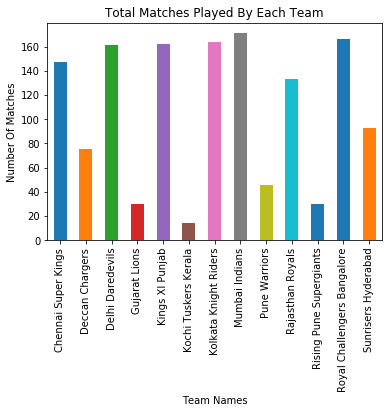

In [14]:
# Plotting the Results
total_matches.plot(kind='bar', title='Total Matches Played By Each Team')
plt.xlabel('Team Names')
plt.ylabel('Number Of Matches')
plt.show()

Obseravation: Mumbai indians played More number of matches followed by Royal Challengers Banglore